<a href="https://colab.research.google.com/github/MKrezheska/data-mining-project/blob/main/5_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

pd.options.display.max_columns = None

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
# importing the data
df = pd.read_csv('/content/drive/My Drive/with_genres.csv', index_col=0)
df.head()

,Unnamed: 0.1,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,type,popularity,uri,title,artist,year,target,genre
0,0,0.425,0.100,135.128,0.375,0.328,0.130000,4,0.701,7,194088,-10.965,0.5620,1,audio_features,89,spotify:track:2Fxmhks0bxGSBdJ92vM42m,bad guy,Billie Eilish,2019,1,22
1,1,0.125,0.265,111.554,0.239,0.751,0.002070,4,0.521,9,243725,-17.832,0.0528,1,audio_features,78,spotify:track:4QIo4oxwzzafcBWkKjDpXY,xanny,Billie Eilish,2019,1,22
2,2,0.533,0.139,150.455,0.186,0.462,0.219000,4,0.678,4,180953,-10.485,0.3230,1,audio_features,81,spotify:track:3XF5xLJHOQQRbWya6hBp7d,you should see me in a crown,Billie Eilish,2019,1,22
3,3,0.444,0.177,185.044,0.372,0.283,0.143000,4,0.726,8,168840,-8.922,0.5690,0,audio_features,80,spotify:track:6IRdLKIyS4p7XNiP8r6rsx,all the good girls go to hell,Billie Eilish,2019,1,22
4,4,0.351,0.752,118.028,0.241,0.390,0.000009,4,0.853,7,221543,-10.198,0.2820,1,audio_features,81,spotify:track:3Fj47GNK2kUF0uaEDgXLaD,wish you were gay,Billie Eilish,2019,1,22


In [116]:
print("Data Frame Dimensions:")
print("Lines:\t\t{}".format(df.shape[0]))
print("Columns:\t{}".format(df.shape[1]))

Data Frame Dimensions:
Lines:		1991
Columns:	22


In [117]:
df.describe()

,Unnamed: 0.1,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,popularity,year,target,genre
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,995.000000,0.696928,0.191665,122.406302,0.091047,0.195953,0.045246,3.945756,0.592694,5.341537,231731.462079,-6.712404,0.493260,0.576092,40.989955,2009.403315,0.504269,19.937217
std,574.896512,0.192618,0.144913,28.506120,0.102294,0.243334,0.160732,0.343015,0.165337,3.564041,70768.382426,2.978610,0.246281,0.494300,22.109433,12.264160,0.500107,12.292195
min,0.000000,0.055500,0.016800,52.538000,0.023800,0.000002,0.000000,1.000000,0.122000,0.000000,15160.000000,-25.932000,0.031900,0.000000,0.000000,1964.000000,0.000000,0.000000
25%,497.500000,0.575500,0.097200,100.001000,0.035800,0.017000,0.000000,4.000000,0.480000,2.000000,193520.000000,-8.006000,0.294000,0.000000,24.000000,2007.000000,0.000000,12.000000
50%,995.000000,0.728000,0.133000,121.319000,0.051200,0.087600,0.000004,4.000000,0.602000,5.000000,220840.000000,-6.145000,0.480000,1.000000,45.000000,2014.000000,1.000000,19.000000
75%,1492.500000,0.851000,0.255500,140.080000,0.096950,0.284000,0.000731,4.000000,0.711500,9.000000,253273.000000,-4.785000,0.686000,1.000000,57.000000,2018.000000,1.000000,33.000000
max,1990.000000,0.994000,0.973000,216.158000,0.966000,0.994000,0.973000,5.000000,0.968000,11.000000,809893.000000,0.226000,0.977000,1.000000,100.000000,2020.000000,1.000000,42.000000


In [118]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [119]:
df_cluster = pd.concat([df.iloc[:150], df.iloc[1800:]])

In [120]:
df_cluster = df_cluster.drop(["Unnamed: 0.1", "title", "artist", "uri", "target", "type", "time_signature", "year", "genre"], axis="columns")
df_cluster.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode,popularity
0,0.425,0.100,135.128,0.375,0.328,0.130000,0.701,7,194088,-10.965,0.5620,1,89
1,0.125,0.265,111.554,0.239,0.751,0.002070,0.521,9,243725,-17.832,0.0528,1,78
2,0.533,0.139,150.455,0.186,0.462,0.219000,0.678,4,180953,-10.485,0.3230,1,81
3,0.444,0.177,185.044,0.372,0.283,0.143000,0.726,8,168840,-8.922,0.5690,0,80
4,0.351,0.752,118.028,0.241,0.390,0.000009,0.853,7,221543,-10.198,0.2820,1,81


In [121]:
df_cluster.columns

Index(['energy', 'liveness', 'tempo', 'speechiness', 'acousticness',
       'instrumentalness', 'danceability', 'key', 'duration_ms', 'loudness',
       'valence', 'mode', 'popularity'],
      dtype='object')

In [122]:
X = df_cluster

In [123]:
X.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode,popularity
0,0.425,0.100,135.128,0.375,0.328,0.130000,0.701,7,194088,-10.965,0.5620,1,89
1,0.125,0.265,111.554,0.239,0.751,0.002070,0.521,9,243725,-17.832,0.0528,1,78
2,0.533,0.139,150.455,0.186,0.462,0.219000,0.678,4,180953,-10.485,0.3230,1,81
3,0.444,0.177,185.044,0.372,0.283,0.143000,0.726,8,168840,-8.922,0.5690,0,80
4,0.351,0.752,118.028,0.241,0.390,0.000009,0.853,7,221543,-10.198,0.2820,1,81


In [124]:
print(X.shape)
df_cluster.head()

(341, 13)


,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode,popularity
0,0.425,0.100,135.128,0.375,0.328,0.130000,0.701,7,194088,-10.965,0.5620,1,89
1,0.125,0.265,111.554,0.239,0.751,0.002070,0.521,9,243725,-17.832,0.0528,1,78
2,0.533,0.139,150.455,0.186,0.462,0.219000,0.678,4,180953,-10.485,0.3230,1,81
3,0.444,0.177,185.044,0.372,0.283,0.143000,0.726,8,168840,-8.922,0.5690,0,80
4,0.351,0.752,118.028,0.241,0.390,0.000009,0.853,7,221543,-10.198,0.2820,1,81


In [125]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [126]:
scaled = pd.DataFrame(scaler.fit_transform(X))
scaled.columns = X.columns

In [127]:
scaled.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,valence,mode,popularity
0,0.395399,0.094631,0.510058,1.000000,0.335375,0.140845,0.708690,0.636364,0.164115,0.518646,0.565171,1.0,0.988636
1,0.074371,0.282302,0.346931,0.612204,0.767893,0.002243,0.488372,0.818182,0.266909,0.223278,0.021154,1.0,0.863636
2,0.510968,0.138990,0.616118,0.461078,0.472390,0.237270,0.680539,0.363636,0.136914,0.539292,0.309829,1.0,0.897727
3,0.415730,0.182211,0.855466,0.991446,0.289363,0.154930,0.739290,0.727273,0.111829,0.606521,0.572650,0.0,0.886364
4,0.316212,0.836215,0.391729,0.617907,0.398770,0.000010,0.894737,0.636364,0.220972,0.551637,0.266026,1.0,0.897727


In [128]:
scaled= scaler.fit_transform(X)

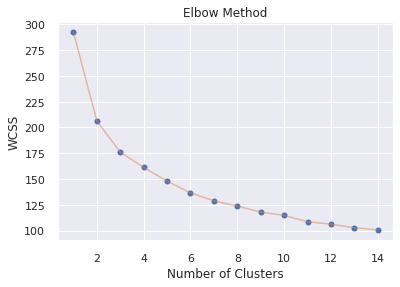

In [129]:
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

Ako brojot na klasteri e  2 prosecniot silhouette_score e : 0.290858814511313
Ako brojot na klasteri e  3 prosecniot silhouette_score e : 0.275566273864007
Ako brojot na klasteri e  4 prosecniot silhouette_score e : 0.21177998855422164
Ako brojot na klasteri e  5 prosecniot silhouette_score e : 0.18032264672136333
Ako brojot na klasteri e  6 prosecniot silhouette_score e : 0.19138270052914777
Ako brojot na klasteri e  7 prosecniot silhouette_score e : 0.20092111554226974
Ako brojot na klasteri e  8 prosecniot silhouette_score e : 0.178722722434772
Ako brojot na klasteri e  9 prosecniot silhouette_score e : 0.18571163276080027
Ako brojot na klasteri e  10 prosecniot silhouette_score e : 0.17678997019922768
Ako brojot na klasteri e  11 prosecniot silhouette_score e : 0.17274766566301028
Ako brojot na klasteri e  12 prosecniot silhouette_score e : 0.15877352193714692
Ako brojot na klasteri e  13 prosecniot silhouette_score e : 0.15853730846566183
Ako brojot na klasteri e  14 prosecniot si

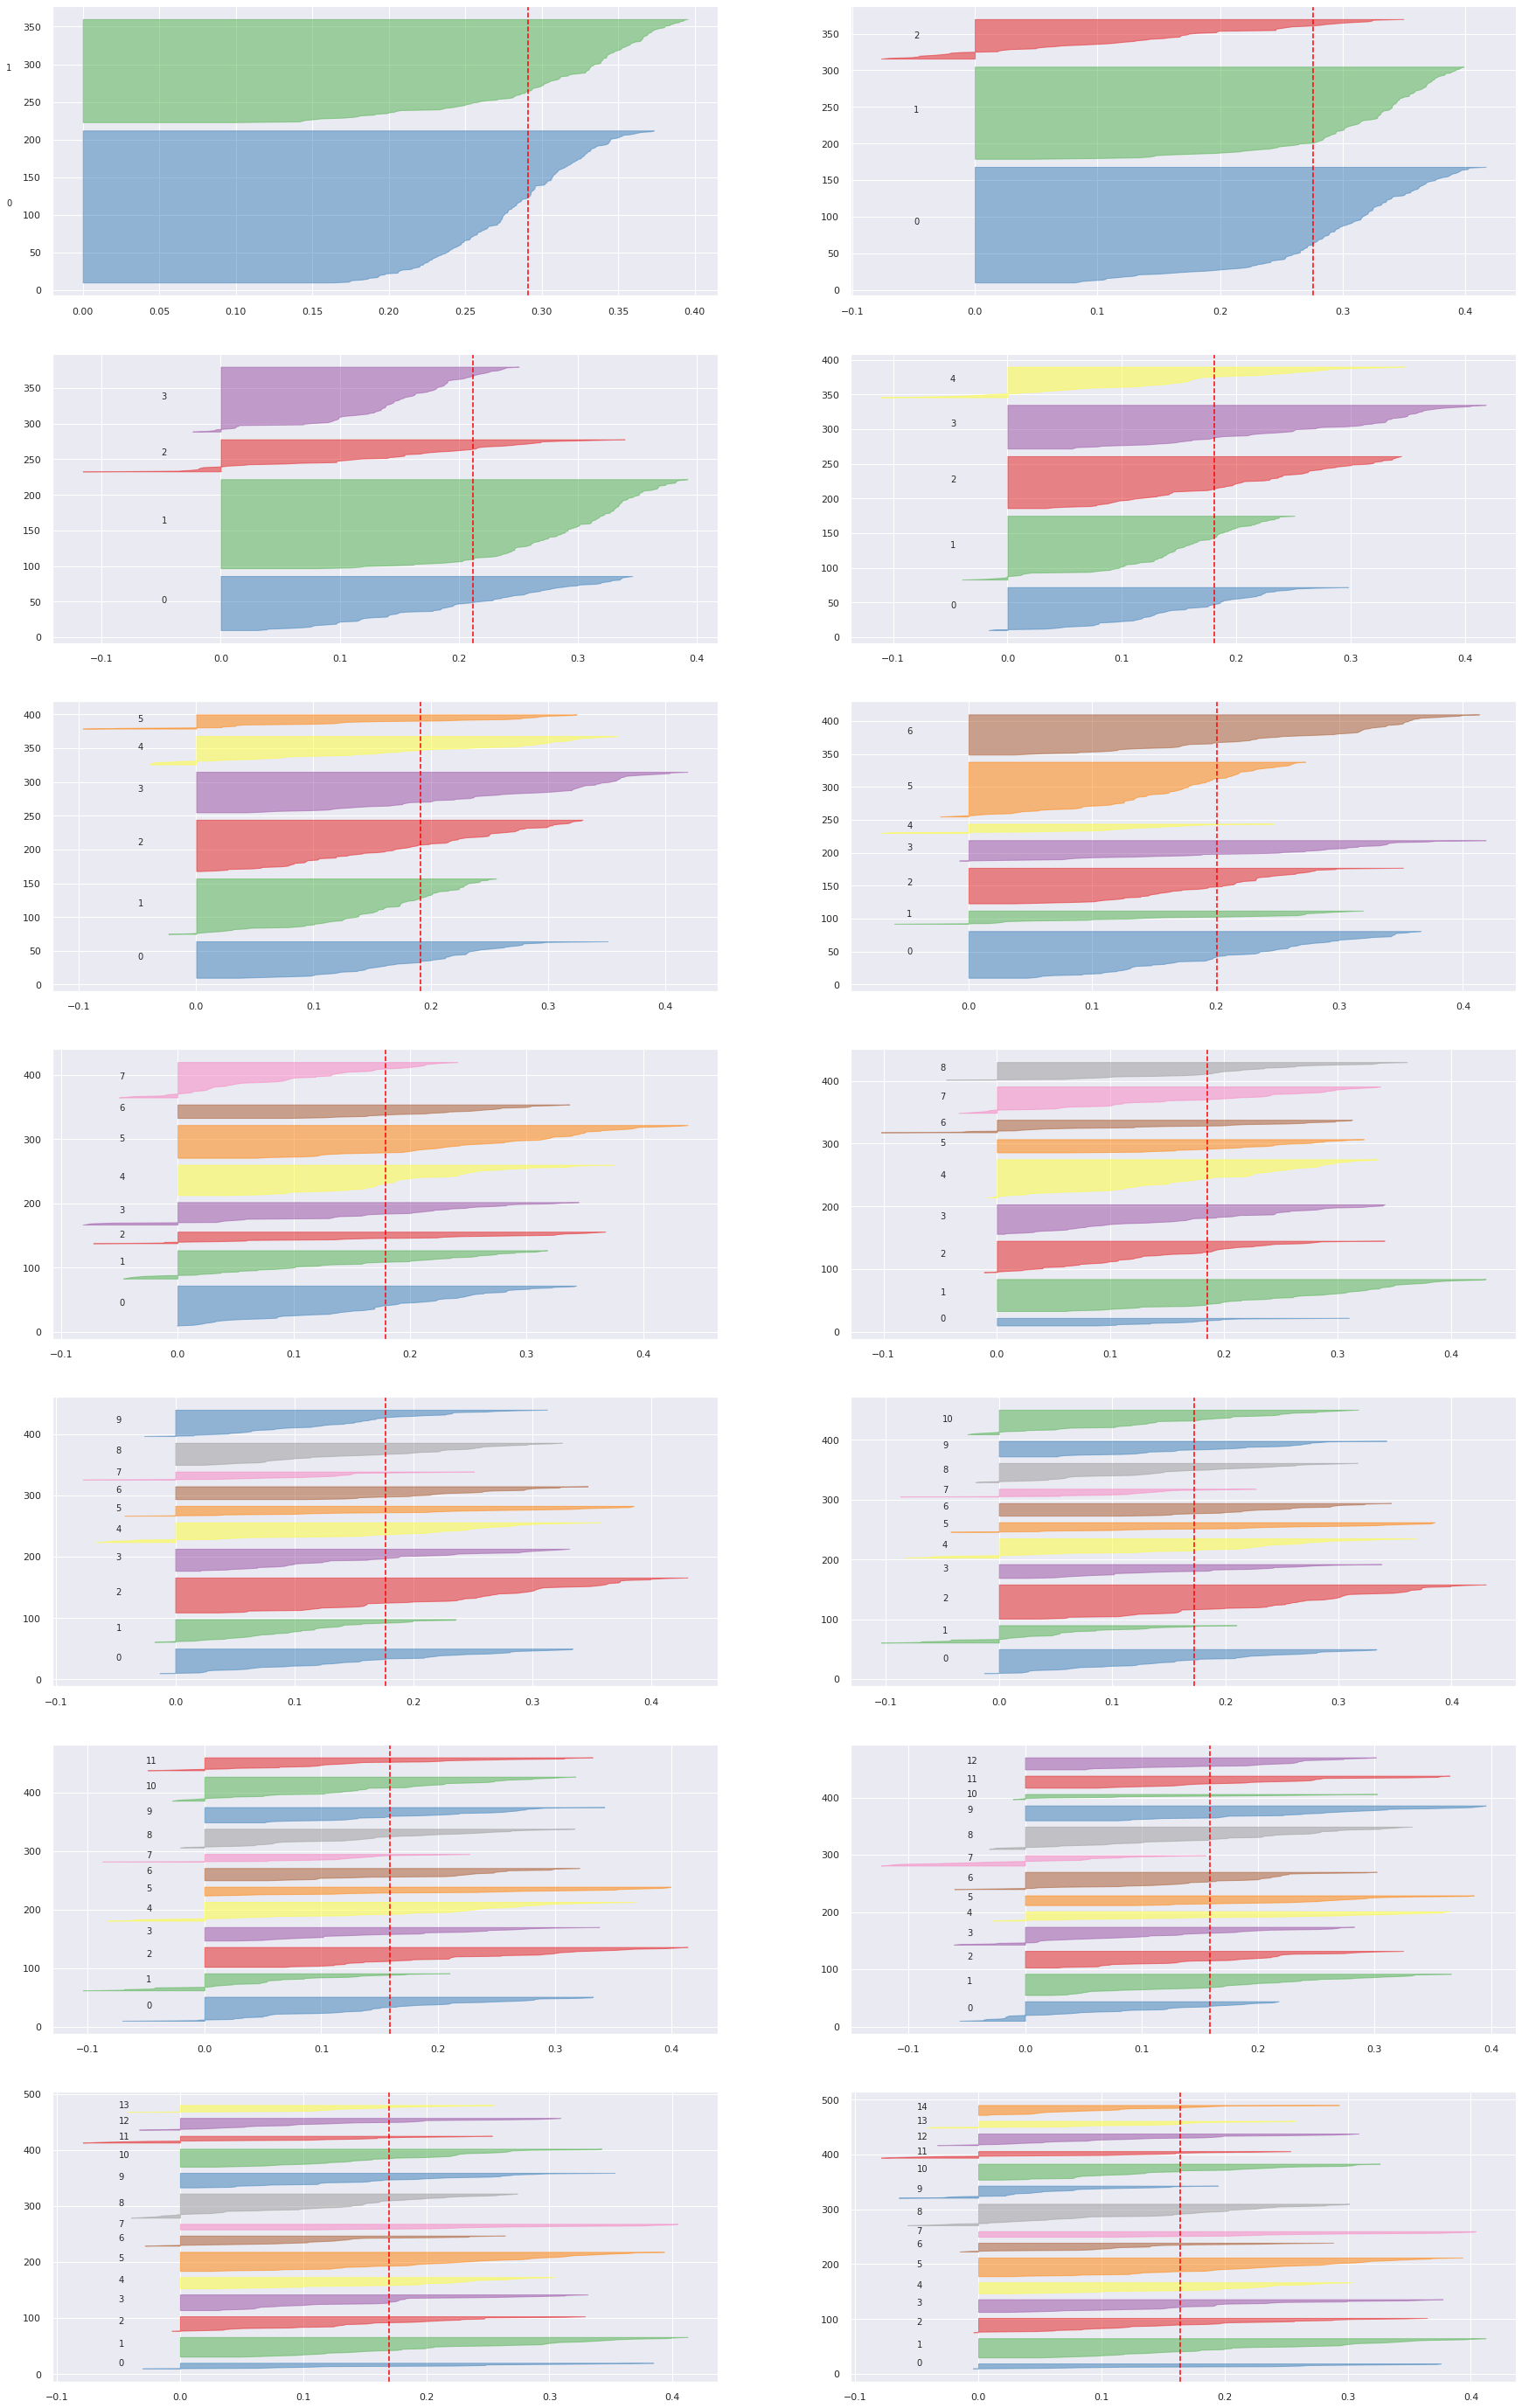

In [131]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score


fig, ax = plt.subplots(7, 2, figsize=(30,50))
for i in range(2, 16):

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    cluster_labels = km.fit_predict(scaled)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled)

    silhouette_avg = silhouette_score(scaled, cluster_labels)
    print("Ako brojot na klasteri e ", i,
          "prosecniot silhouette_score e :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(scaled, cluster_labels)

In [132]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [133]:
from math import sqrt
print(optimal_number_of_clusters(wcss))

7


In [134]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(scaled)

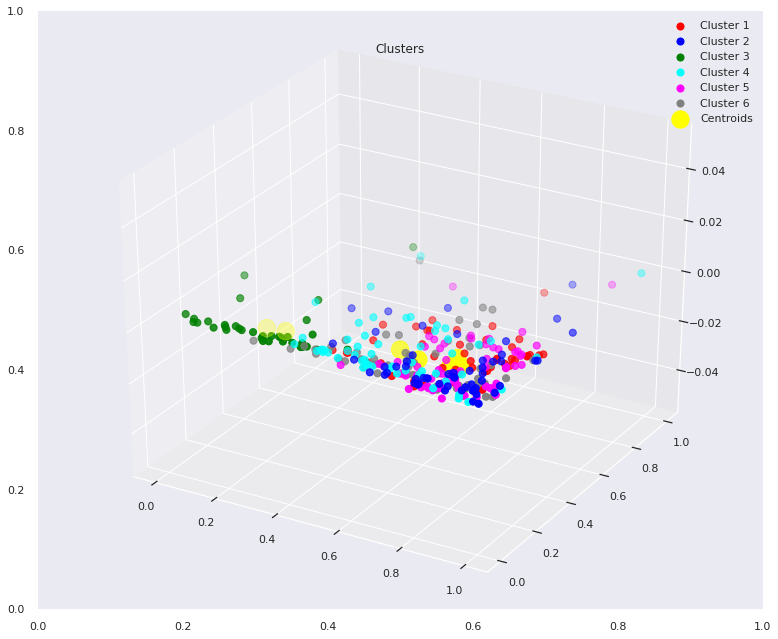

In [136]:
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[y_kmeans == 5,0], scaled[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [137]:
df_cluster['k_cluster'] = y_kmeans

In [138]:
# checking for null
(df_cluster.isnull().sum()/ df_cluster.shape[0]).sort_values(ascending=False)

k_cluster           0.0
popularity          0.0
mode                0.0
valence             0.0
loudness            0.0
duration_ms         0.0
key                 0.0
danceability        0.0
instrumentalness    0.0
acousticness        0.0
speechiness         0.0
tempo               0.0
liveness            0.0
energy              0.0
dtype: float64

In [139]:
# popularity mean by cluster
df_cluster.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
6    67.619048
2    58.138889
1    55.654545
5    41.684211
3    40.210526
0    17.622642
4    14.048387
Name: popularity, dtype: float64

In [140]:
df_cluster['k_cluster'].value_counts()

4    62
5    57
3    57
1    55
0    53
2    36
6    21
Name: k_cluster, dtype: int64

In [141]:
df_cluster.groupby("k_cluster").describe() 


energy                                                              \
           count      mean       std     min     25%     50%      75%    max   
k_cluster                                                                      
0           53.0  0.801321  0.132919  0.5010  0.7160  0.8310  0.90400  0.980   
1           55.0  0.808200  0.139529  0.4110  0.7060  0.8480  0.90700  0.985   
2           36.0  0.284469  0.126360  0.0555  0.1860  0.3135  0.37025  0.533   
3           57.0  0.649000  0.165788  0.3090  0.5280  0.6390  0.76600  0.988   
4           62.0  0.832774  0.100753  0.5650  0.7755  0.8440  0.92225  0.990   
5           57.0  0.719404  0.167342  0.2960  0.6110  0.7280  0.85800  0.989   
6           21.0  0.337095  0.105653  0.1230  0.2960  0.3630  0.39400  0.573   

          liveness                                                       \
             count      mean       std     min      25%    50%      75%   
k_cluster                                                                 
0             53.0  0.229292  0.123965  0.0411  0.11900  0.231  0.32400   
1             55.0  0.184984  0.146659  0.0352  0.08645  0.131  0.25800   
2             36.0  0.147597  0.125010  0.0795  0.09915  0.108  0.11925   
3             57.0  0.202840  0.166632  0.0314  0.10200  0.129  0.31200   
4             62.0  0.194981  0.144705  0.0168  0.09180  0.139  0.29200   
5             57.0  0.175625  0.132099  0.0526  0.08910  0.128  0.20600   
6             21.0  0.155019  0.104906  0.0732  0.08960  0.105  0.20800   

                 tempo                                                     \
             max count        mean        std     min       25%       50%   
k_cluster                                                                   
0          0.670  53.0  133.518849  32.343092  75.050  109.5960  127.0280   
1          0.748  55.0  118.189018  22.927047  75.235  100.0625  115.9820   
2          0.752  36.0  119.940306  33.084490  62.446   95.5380  120.0395   
3          0.896  57.0  121.427439  30.148126  72.666   96.6680  118.1380   
4          0.797  62.0  118.638806  28.344312  71.856   96.0280  111.1640   
5          0.687  57.0  116.517719  27.528167  61.418  102.0400  114.9930   
6          0.482  21.0  110.637571  30.947382  67.513   85.2220  115.2840   

                              speechiness                              \
                 75%      max       count      mean       std     min   
k_cluster                                                               
0          160.07300  205.931        53.0  0.061477  0.050114  0.0243   
1          131.41250  179.341        55.0  0.067104  0.042214  0.0250   
2          144.05875  189.793        36.0  0.097561  0.105905  0.0259   
3          141.80100  200.091        57.0  0.050514  0.041237  0.0246   
4          130.06575  192.049        62.0  0.075281  0.057903  0.0291   
5          126.04500  189.929        57.0  0.051470  0.026627  0.0243   
6          129.56500  185.044        21.0  0.117243  0.111294  0.0311   

                                             acousticness                      \
               25%      50%       75%    max        count      mean       std   
k_cluster                                                                       
0          0.03590  0.04550  0.065000  0.276         53.0  0.211689  0.184291   
1          0.03560  0.05280  0.082300  0.219         55.0  0.029525  0.051921   
2          0.03125  0.04135  0.098900  0.375         36.0  0.756306  0.178087   
3          0.02850  0.03530  0.049000  0.225         57.0  0.173061  0.189285   
4          0.03980  0.05420  0.077425  0.305         62.0  0.286133  0.179389   
5          0.03200  0.04040  0.062900  0.137         57.0  0.101181  0.160567   
6          0.04280  0.07160  0.106000  0.372         21.0  0.656333  0.263379   

                                                       instrumentalness  \
                min       25%      50%      75%    max            coun